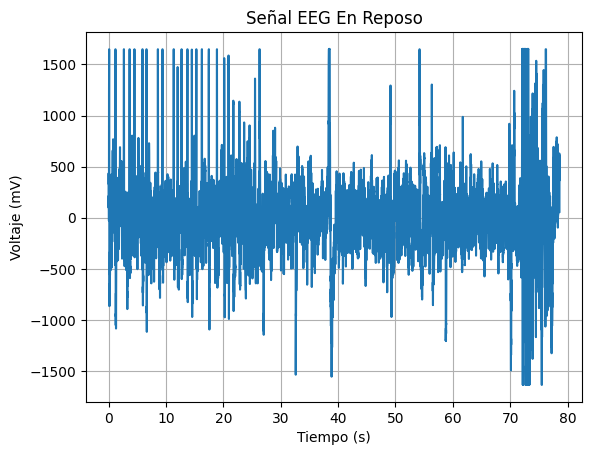

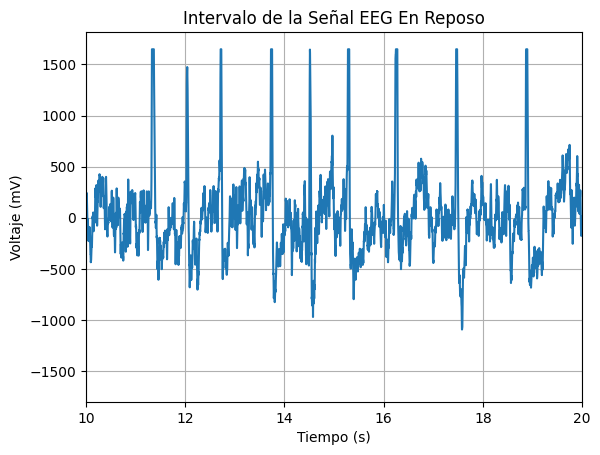

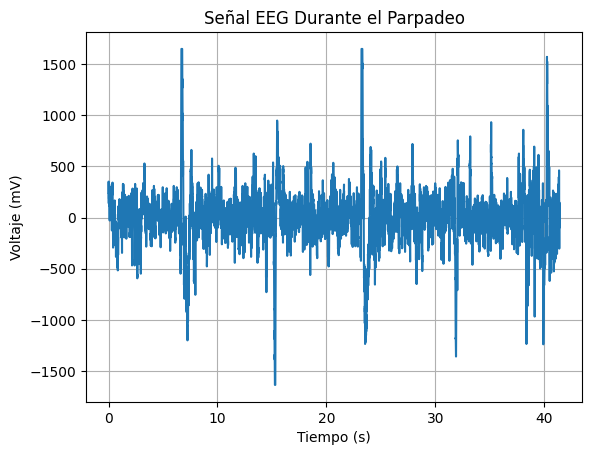

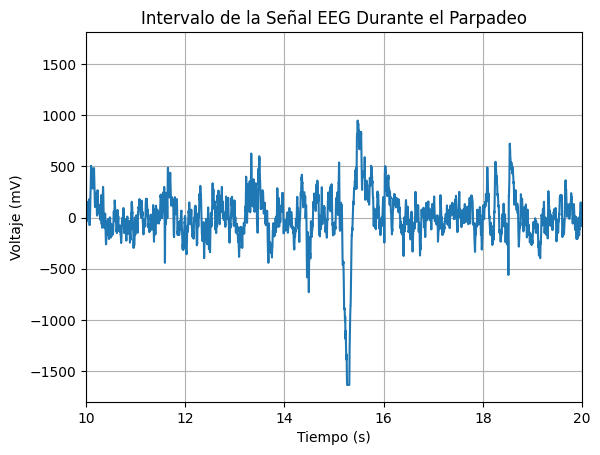

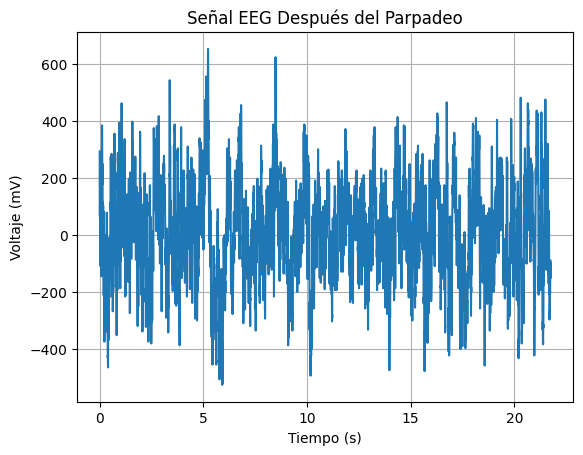

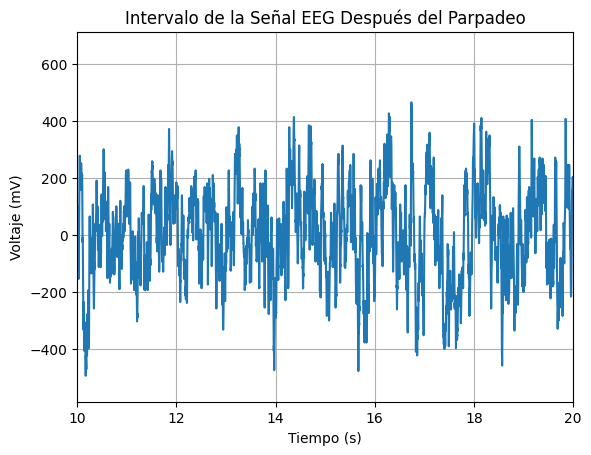

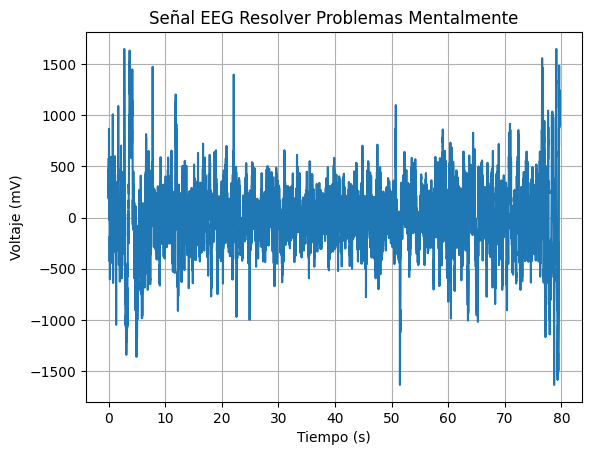

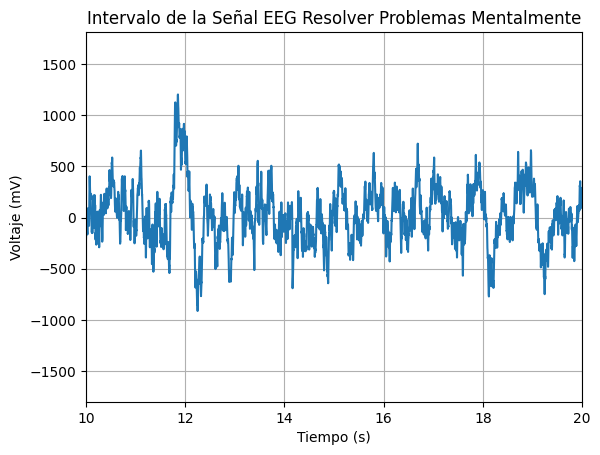

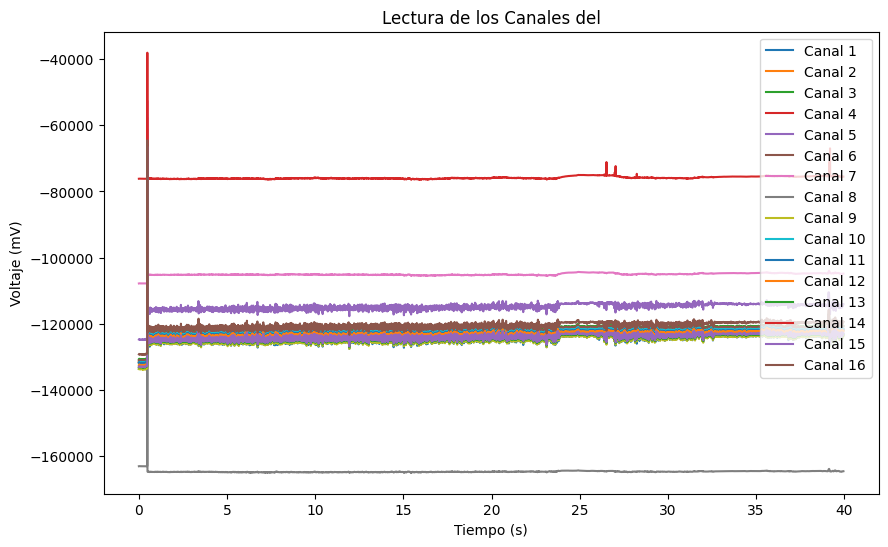

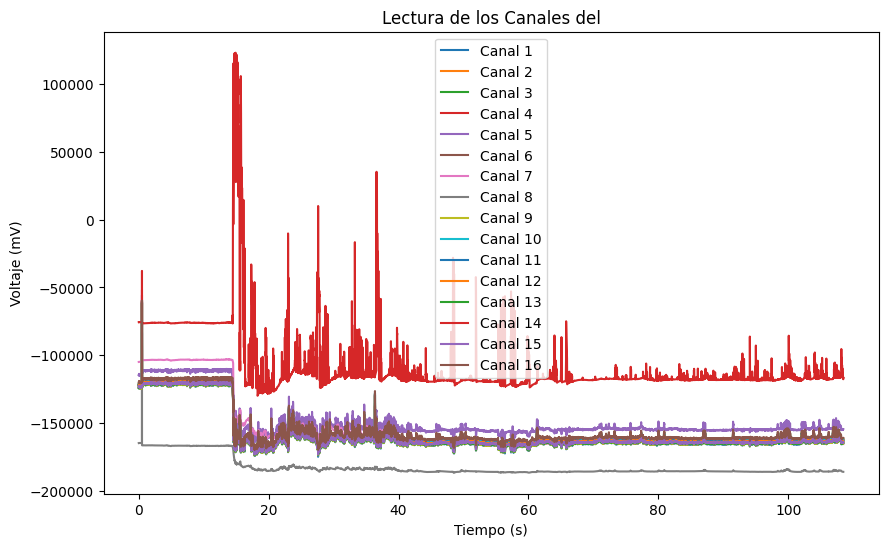

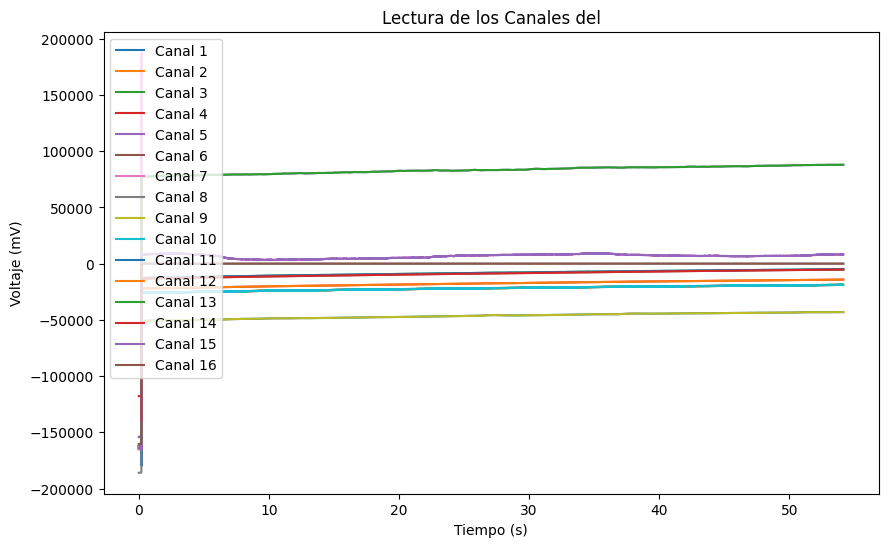

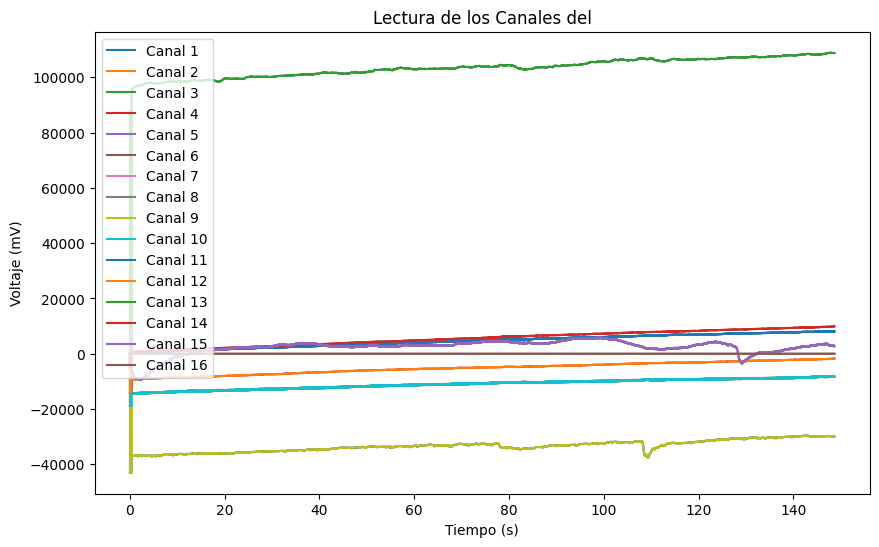

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar la última columna que contiene los valores de la señal EEG
for x in ['En Reposo.txt', 'Durante el Parpadeo.txt', 'Después del Parpadeo.txt', 'Resolver Problemas Mentalmente.txt']:
  # Cargar los datos de la señal EEG desde el archivo de texto
  EEG_data = np.loadtxt(x)
  columna_EEG = EEG_data[:, -1]
  """Debido a que la señal muestreada por el EEG del BiTalino son del ADC de 10 bits; entonces esta data oscila
  de 0-1023. Pero considerando que el voltaje de operación es de 3.3V, se debe hacer una conversión de 0-1023 a 0-3.3V"""
  columna_Volt = ((columna_EEG-507)/1023)*3.3*1000
  """Dado que el BiTalino te brinda el total de datos y no el tiempo, podemos obtener
  la duración del muestreo gracias a la frecuencia de meustreo del BiTalino: 1000 Hz"""
  fs = 1000
  total_data = len(columna_Volt)
  time_total = total_data/fs
  """Teniendo la duración y la cantidad de muestreo, se realizó otra lista para el eje X
  que equivale al Tiempo, con intervalos iguales para obtener un tamaño de lista igual al del Eje Y"""
  time_data = np.linspace(0, time_total, total_data)
  #Para visualizar solo una porción del gráfico
  t_start = 8.5 # @param {type:"number"}
  t_end = 9.2  # @param {type:"number"}
  index_start = round(t_start*(total_data-1)/time_total)
  index_end = round(t_end*(total_data-1)/time_total)

  #Plotear la señal EEG en el dominio del tiempo
  plt.plot(time_data, columna_Volt)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Señal EEG '+x.replace('.txt', ''))
  plt.grid()
  plt.show()

  #Ploteo de la señal de EEG en un intervalo
  plt.plot(time_data, columna_Volt)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Intervalo de la Señal EEG '+x.replace('.txt', ''))
  plt.xlim([10, 20])
  plt.grid()
  plt.show()

for x in ("OpenBCI - En Reposo.txt", "OpenBCI - Durante el Parpadeo.txt", "OpenBCI - Después del Parpadeo.txt", "OpenBCI - Resolver Problemas Mentalmente.txt"):
  # Read the text file
  with open(x, "r") as file:
      data = file.readlines()

  # Split the data by channels
  channels = []
  for line in data:
      values = line.strip().split(',')  # Assuming values are separated by commas
      for i, value in enumerate(values):
          if i >= len(channels):
              channels.append([])
          try:
              channels[i].append(float(value))
          except ValueError:
              # Handle non-numeric values (e.g., empty strings)
              pass

  # Plot channels 1 and 2
  plt.figure(figsize=(10, 6))
  for i in range(1, 17):
    plt.plot(list(map(lambda x: x/125, range(0, len(channels[i][:])))), channels[i][:], label='Canal '+str(i))
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Lectura de los Canales del')
  plt.legend()
  plt.show()